Here we are trying to create a (m+1) dimensional data set of size n consisting of m continuous independent
variables (X) and one dependent variable (Y) defined as: $$ y_i = x_i.β + e $$ 
where 

*   e is a Gaussuan distribution with mean 0 and standard deviation ($σ$), representing the unexplained
variation in Y.
*  $\beta$  is a random vector of dimensionality m + 1, representing the coefficients of the linear relationship
between X and Y, 
*  $∀$i ∈ [1, n]; $x_{i0} = 1$



In [2]:
import numpy as np

def gen_data(sigma, n, m):
    X = np.random.rand(n, m + 1)
    X[:, 0] = 1  # first column set to 1
    e = sigma * np.random.randn(n, 1)  # Gaussian distribution of noise 'e' with mean = 0 and standard deviation sigma
    beta = np.random.rand(m + 1, 1)  # random coefficients
    Y = np.matmul(X, beta) + e  # Y = bX + e
    
    return X, beta, Y




In [4]:
#  gen_data(0.05, 3, 4)

The function should implement the **Gradient Descent** algorithm as discussed in class that initialises  with
random values and then updates these values in each iteraction by moving in the the direction defined by
the partial derivative of the cost function with respect to each of the coefficients. The function should use
only one loop that ends after a number of iterations (k) or a threshold on the change in cost function value
(τ).
The output should be an m + 1 dimensional vector of coefficients and the final cost function value.
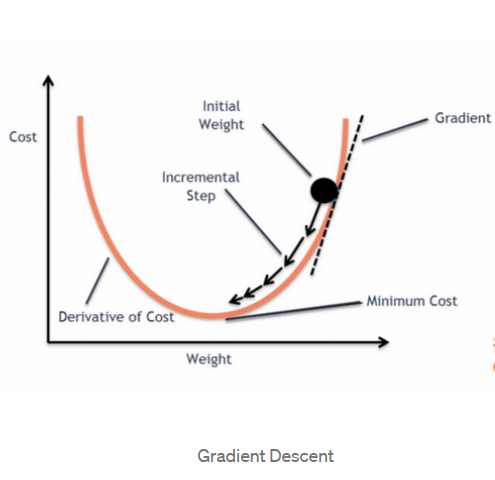

Cost function is defined to be $$ C = \dfrac{1}{n}\sum_{i=1}^n \left(\sum_{k=0}^m x_{ik}β_k - y_i\right)^2$$ which can be written in terms of vector notation as the following : $$C=1/n.\sum_{i=1}^n(X_i\cdot β - Y_i)$$

In [5]:
def linreg(gen_data, k, t, delta):
    X, beta, Y = gen_data(sigma, n, m)
    z = float(len(X))
    b = np.random.rand(m + 1, 1)  # random initialization of the parameters
    previous_cost = 0  # initial cost set to 0
    cost = []

    for i in range(k):  # k is number of iterations
        cost.append(previous_cost)
        y_pred = np.matmul(X, b)  # predicted y
        temp = np.subtract(Y, y_pred)  # Y−Xb

        current_cost = (1 / z) * np.matmul(np.transpose(temp), temp)  # cost function
        if abs(current_cost - previous_cost) <= t:  # threshold condition on change in cost function
            break
        previous_cost = current_cost

        grad = -np.matmul(np.transpose(X), temp)  # gradient calculation
        b = b - delta * grad  # improved b, delta is step size / learning parameter

    print('actual beta values:\n{}'.format(beta))
    print("coefficients learnt using gradient descent:\n{}\ncost: {}".format(b, cost[-1]))



In [6]:
sigma = 0.07
n = 3
m = 4
linreg(gen_data, 1000000, 1e-10, 0.105)

actual beta values:
[[0.27100116]
 [0.5935828 ]
 [0.7655939 ]
 [0.41601456]
 [0.39455359]]
coefficients learnt using gradient descent:
[[ 0.68706925]
 [-0.07918367]
 [ 0.47958868]
 [ 0.17917216]
 [ 0.37135535]]
cost: [[2.563195e-09]]
